In [7]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial
from scipy import optimize
from scipy.stats import gamma, norm

# Lecture 2: Model comparison

* **2.2 Evidence framework and model comparison**
    * The evidence framework
    * Laplace approximation
    * Model comparison in curve fitting

## Model comparison: the evidence framework

Consider models $H_i$ with parameters $w_i$, priors $p(w_i|H_i)$ and likelihoods $p(D|w_i,H_i)$.

For each $H_i$, we can compute the posterior distribution over $w_i$
$$p(w_i|D,H_i)=\frac{p(D|w_i,H_i)p(w_i|H_i)}{p(D|H_i)} \qquad p(D|H_i)=\int dw_i p(D|w_i,H_i)p(w_i|H_i)$$

The normalization constants $p(D|H_i)$ are called the **model evidence** and appear as the likelihood in model comparison
$$p(H_i|D)=\frac{p(D|H_i)p(H_i)}{p(D)}$$

## Comparing different models: Occam's razor

Bayesian model comparison naturally implements **Occam's razor**:

_Entia non sunt multiplicanda praeter necessitatem_ or _Entities must not be multiplied beyond necessity_

Simple models explain (i.e. assign higher probability to) only few data sets (but really well\!). Complex models explain many data sets by using the freedom of $w$.
$$p(D| H)=\int dw p(D|w,H) p(w|H)$$

<center><img src="figs/model_comparison_evidence.png" width=300></center>

Since $p(D|H_2)$ is broader, $p(D|H_1)$ is higher because of normalization: $\int dD p(D|H)=1$. Both $H_{1,2}$ and $H_{2}$ explain $D\in C_1$, but the simpler model $H_1$ is more likely.

## Comparing different models: Occam's razor

<center><img src="figs/evidence_2d.png" width=500></center>

Three models with equal priors $p(\mathcal{H}_i)$ but different priors $p(w|\mathcal{H}_i)$.

$w,D$ are one dimensional and $p(D|w,\mathcal{H}_i)=\mathcal{N}(D|w,\epsilon)$ for all models.

Joint distribution $p(D,w|\mathcal{H}_i)=p(D|w,\mathcal{H}_i)p(w|\mathcal{H}_i)$ shown as as point clouds.

Given particular $D$, $p(D|\mathcal{H}_i)$ is highest for $i=2$. It is the simplest model that explains the data.

### Occam's razor: A 1-dimensional heuristic argument

The posterior over parameters is always more narrow than the prior:
$$p(w|D,\mathcal{H}_i)\propto p(D|w,\mathcal{H}_i) p(w|\mathcal{H}_i)$$

<center><img src="figs/model_comparison_heuristic.png" width=350></center>

Assume the posterior is peaked around a value $w_\mathrm{MP}$ with a width by $\sigma_{w|D}$. Take for simplicity a flat prior in region $\sigma_w$, i.e. $p(w|\mathcal{H}_i)=\frac{1}{\sigma_w}$.

Approximate the un-normalized posterior by its value $w_\mathrm{MP}$, then:

$$p(D|\mathcal{H}_i)=\int dw p(D|w,\mathcal{H}_i)p(w|\mathcal{H}_i)\approx \underbrace{p(D|w_\mathrm{MP},\mathcal{H}_i)}_{\text{best fit}} \underbrace{\frac{\sigma_{w|D}}{\sigma_w}}_{\text{Occams factor}}$$


Occam factor is equal to the ratio of the posterior accessible volume of $\mathcal{H}_i$’s parameter space to the prior accessible volume. 

Equivalently, the logarithm of the Occam factor is a measure of the amount of information we gain about the model’s parameters when the data arrive (recall that the entropy of a Gaussian is the log of its std).

# How do we compute the evidence in practice?

## _Intermezzo: Laplace method_

We have an unnormalized probability density $P^*(x)$ with normalization constant $Z_P=\int P^*(x) dx$ with a peak at $x_0$.

We Taylor-expand the logarith of $P^*(x)$ around its peak:

$$ \log P^*(x) \simeq \log P^*(x_0) - \frac{c}{2} \left( x - x_0\right)^2$$

where

$$c = - \frac{d^2}{dx^2} \log P^*(x)|_{x=x_0}$$

We approximate $P^*(x)$ by an unnormalized Gaussian

$$Q^*(x) = P^*(x_0) \exp \left[ -\frac{c}{2} \left( x - x_0\right)^2 \right]$$

The results are easily generalized to the higher dimensional case using well-known properties of the Gaussian distribution:

https://en.wikipedia.org/wiki/Multivariate_normal_distribution

https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf

## The Laplace approximation to the evidence

When there is a lot of data, the posterior becomes more peaked. We can thus use the Laplace method to approximate the evidence.

$$p(D|H_i)=\int dw p(D|w,H_i)p(w|H_i) \approx p(D|w_\text{MP},H_i)p(w_\text{MP}|H_i)\sqrt{\frac{(2\pi)^M}{\det A}}$$

$$\log p(D|H_i) \propto \underbrace{\log p(D|w_\text{MP},H_i)}_{\text{data likelihood}} - \underbrace{\left[\frac{1}{2}\log \det \left(\frac{ A}{\left(2\pi\right)^M}\right)+\log p(w_\text{MP}|H_i)\right]}_{\text{complexity term}}$$

with $A=-\nabla\nabla \log p(w_\mathrm{MP}|D,\mathcal{H}_i)$.

Since $\det A =\prod_{i=1}^M \lambda_i$ we get $\log \det A \propto M$.

## An example of model comparison: polynomial curve fitting

Find the **best curve** explaining a given training set $(x_n,t_n), n=1,\ldots,N$ using $M+1$ nonlinear functions $\Phi_j(x)$ with parameters $w_j$:
$$y(x,w)=\sum_{j=0}^M w_j \Phi_j(x)$$

To do so, we seek to minimize the mean squared error
$$E(w)=\frac{1}{2}\sum_{n=1}^N \left( y(x_n,w)-t_n\right)^2$$

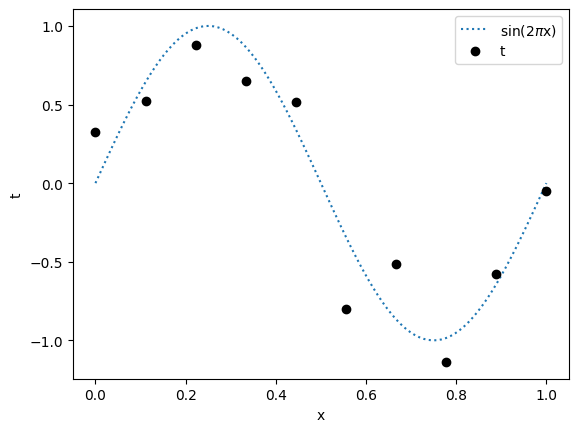

In [2]:
# generate problem
num_x = 10
eps = 0.2 # 0.
seed = 1

np.random.seed(seed)

# generate true underlying function
x_to_plot = np.linspace(0., 1., 100)
t_to_plot = np.sin(2*np.pi*x_to_plot)

# generate learning problem
x = np.linspace(0., 1., num_x) # set 10 points on the x axis between 0 and 2pi
t_true = np.sin(2*np.pi*x) # generate true output
t = t_true + np.random.randn(num_x) * eps # corrupt output with noise

plt.plot(x_to_plot, t_to_plot, ':', label="sin(2$\pi$x)");
plt.plot(x, t, 'o', label='t', color="black");
plt.xlabel('x')
plt.ylabel('t')
plt.legend();

### How to choose the right number of parameters?

We can take $\Phi_j(x)=x^j$ so $y$ is an $M$th order polynomial:
$$y(x,\mathbf{w})=\sum_{j=0}^M w_j x^j$$

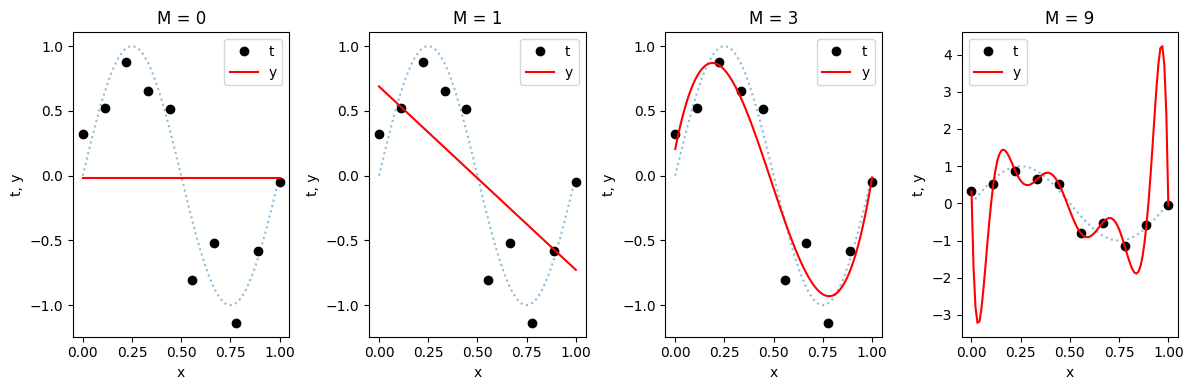

In [3]:
# fit polys with varying degrees
degs = [0, 1, 3, 9]

plt.figure(figsize=(12,4))
for ideg, deg in enumerate(degs):
    p = Polynomial(coef=np.random.randn(deg + 1))
    p = p.fit(x,t,deg)
    y_pred = p(x_to_plot)
    plt.subplot(1, len(degs), ideg+1)
    plt.plot(x_to_plot, t_to_plot, ':', alpha=0.5);
    plt.plot(x, t, 'o', c="black", label='t');
    plt.plot(x_to_plot, y_pred, c="red", label='y');
    plt.legend();
    plt.xlabel("x")
    plt.ylabel("t, y")
    plt.title(f'M = {deg}')

plt.tight_layout();

### How to choose the right number of parameters?

Split the data in a training set and a test set. And define

$$
E_\text{train}(\mathbf{w})=\frac{1}{2}\sum_{n\in \text{train}} \left( y(x_n,\mathbf{w})-t_n\right)^2\qquad
E_\text{test}(\mathbf{w})=\frac{1}{2}\sum_{n\in \text{test}} \left( y(x_n,\mathbf{w})-t_n\right)^2
$$

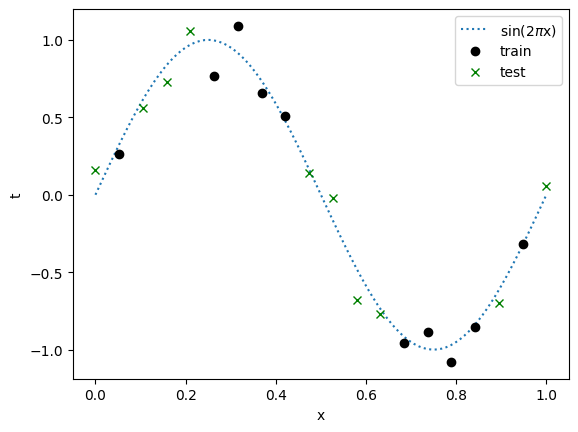

In [4]:
# generate problem
num_train = 10
num_test = 10
eps = 0.1
seed = 1

np.random.seed(seed)
num_x = num_train + num_test

# generate problem
x = np.linspace(0., 1., num_x)
t_true = np.sin(2*np.pi*x)
t = t_true + np.random.randn(num_x) * eps

# select train and test set randomly
perm = np.arange(num_x)
np.random.shuffle(perm)
x_train, t_train = x[perm[:num_train]], t[perm[:num_train]]
x_test, t_test = x[perm[num_train:]], t[perm[num_train:]]

plt.plot(x_to_plot, t_to_plot, ':', label="sin(2$\pi$x)");
plt.plot(x_train, t_train, 'o', label='train', color="black");
plt.plot(x_test, t_test, 'x', label='test', color="green");
plt.xlabel('x')
plt.ylabel('t')
plt.legend();

## Complex models overfit

Too simple (small $M$) $\rightarrow$ poor fit

Too complex (large $M$) $\rightarrow$ overfitting (fits the noise)

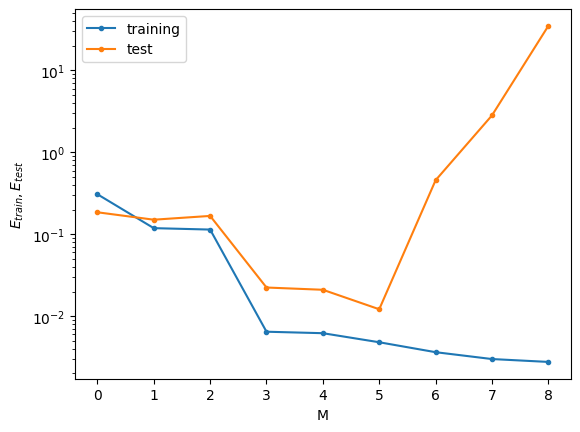

In [5]:
# fit polys with varying degrees
degs = np.arange(9)

errs_train, errs_test = np.zeros(len(degs)), np.zeros(len(degs))
coeffs = []
for ideg, deg in enumerate(degs):
    p = Polynomial(coef=np.random.rand(deg + 1))
    p = p.fit(x_train, t_train, deg)
    coeffs.append(p.coef) # note: the fitting process shifts x -> [-1,1] so coef are not exacly w_j
    y_train = p(x_train)
    y_test = p(x_test)
    errs_train[ideg] = 0.5 * ((y_train - t_train)**2).mean()
    errs_test[ideg] = 0.5 * ((y_test - t_test)**2).mean()

plt.plot(degs, errs_train, '.-', label="training")
plt.plot(degs, errs_test, '.-', label="test")
plt.xlabel('M')
plt.ylabel('$E_{train}, E_{test}$')
plt.legend();
plt.yscale('log')

## Complex models fit data using large weights

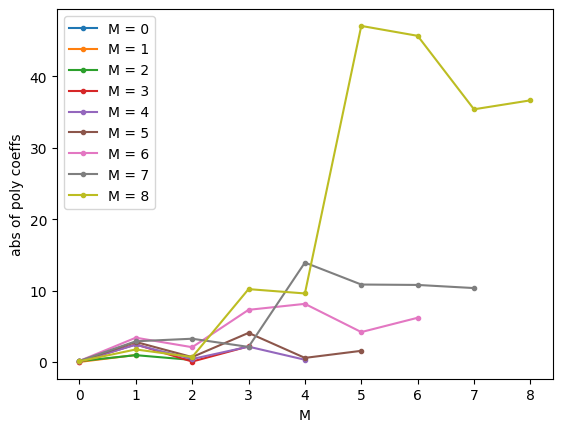

In [6]:
# look at the scale of the weights
# WARNING: these are weights wrt a (possibly) shifted input variable x because of internal workings of numpy.Polynomial
for ic, coef in enumerate(coeffs):
    plt.plot(np.abs(coef), '.-', label=f'M = {degs[ic]}')
plt.legend();
plt.xlabel('M')
plt.ylabel('abs of poly coeffs');

## Bayesian model comparison for regression

<center><img src="figs/model_comparison_bayesian_regression.png" width=400></center>

Label the different models $H_i=M$ and assume some observation noise with (known) variance $\sigma^2$. The probability of observing $t$ given $x$ reads:

$$p(t|x,w,M) = \mathcal{N}(t|y(x,w),\beta) =\sqrt{\frac{\beta}{2\pi}}\exp\left(-\frac{\beta}{2}\left(t-y(x,w)\right)^2\right)$$
with $y(x,w)=\sum_{i=0}^M w_i \Phi_i(x)$. $\beta = 1/\sigma^2$ is called _precision_.

## Bayesian model comparison for regression

Prior over weights ($\alpha$ is a parameter):
$$p(w|M,\alpha)=\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2} \exp\left(-\frac{\alpha}{2}\sum_{i=0}^M w_i^2\right)$$
Likelihood:
$$p(D|w,M,\beta) = \prod_{n=1}^N p(t_n|x_n,w,M) =\left(\frac{\beta}{2\pi}\right)^{N/2}\exp\left(-\frac{\beta}{2}\sum_{n=1}^N\left(t_n-y(x_n,w)\right)^2\right)$$
The evidence is (we assume $\alpha,\beta$ given):
$$p(D|M,\alpha,\beta)=\int dw p(D|w,M,\beta)p(w|M,\alpha)$$
$$=\left(\frac{\beta}{2\pi}\right)^{N/2}\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2} \int dw \exp\left(-\frac{\beta}{2}\sum_{n=1}^N\left(t_n-y(x_n,w)\right)^2-\frac{\alpha}{2}\sum_{i=0}^M w_i^2\right)$$
Since $y$ is linear in $w_i$, the Gaussian integral can be computed exactly.

## Bayesian model comparison for regression

Denote $f(w)=\frac{\beta}{2}\sum_{n=1}^N\left(t_n-y(x_n,w)\right)^2+\frac{\alpha}{2}\sum_{i=0}^M w_i^2$. Then
$$p(D|M,\alpha,\beta)=\left(\frac{\beta}{2\pi}\right)^{N/2}\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2} \int dw e^{-f(w)}$$

Since $f$ is a quadratic form, it agrees with its Taylor expansion to second order around any point (Laplace approximation is exact for a Gaussian).

We can thus find minimize $f$, yielding the value $w_\text{MP}$ (most probable $w$), and write:
$$f(w)=f(w_\text{MP}) +\frac{1}{2}(w-w_\text{MP})^T A (w-w_\text{MP})\qquad A_{ij} =\alpha \delta_{ij} + \beta \sum_{n=1}^N \Phi_i(x_n)\Phi_j(x_n)$$
We thus get a Gaussian integral
$$p(D|M,\alpha,\beta)=\left(\frac{\beta}{2\pi}\right)^{N/2}\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2}\exp\left(-f(w_\text{MP})\right)\int dw \exp\left(-\frac{1}{2}(w-w_\text{MP})^T A (w-w_\text{MP})\right)$$
$$=p(D|w_\text{MP},M,\beta)p(w_\text{MP}|M,\alpha)\sqrt{\frac{(2\pi)^{M+1}}{\det A}}$$
since
$$
\left(\frac{\beta}{2\pi}\right)^{N/2}\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2}\exp\left(-f\left(w_{\text{MP}}\right)\right)=\left(\frac{\beta}{2\pi}\right)^{N/2}e^{-\frac{\beta}{2}\sum_{n=1}^{N}\left(t_{n}-y\left(x_{n},w\right)\right)^{2}}\left(\frac{\alpha}{2\pi}\right)^{\left(M+1\right)/2}e^{-\frac{\alpha}{2}\sum_{i=0}^{M}w_{i}^{2}}
$$

## Bayesian model comparison for regression

The final step is to look at the evidence (or better the log evidence)
$$\log p(D|M,\alpha,\beta)= \frac{M+1}{2}\log\alpha+\frac{N}{2}\log\beta-f\left(w_{\text{MP}}\right)-\frac{1}{2}\log\det A-\frac{N}{2}\log2\pi$$
versus $M$ (for fixed $\alpha, \beta$).

# <center>Assignments</center>

#### Ex 2.3

A photon counter is pointed at a remote star for one minute, in order
to infer the rate of photons arriving at the counter per minute, $\lambda$.
Assuming the number of photons collected $r$ has a Poisson distribution
with mean $\lambda$:
$p(r|\lambda) = \frac{e^{-\lambda}\lambda^r}{r\!}$
and assuming an improper prior $p(\lambda) = \frac{1}{\lambda}$:

  * compute the Laplace approximations $p_1(\lambda)$ to
    the posterior distribution.
  * Consider the transformation to new coordinate $y=\log\lambda$, show
    that the prior distribution over $y$ transforms to $p(y)=1$.
  * Transform the posterior distribution to the new variable $y$ and
    compute the Laplace approximation $p_2(y)$.
  * Transform $p_2(y)$ back to $p_2(\lambda)$.
    Plot the posterior $p(\lambda|r)$ and its two approximations
    $p_1(\lambda)$ and $p_2(\lambda)$ for
    $r=2$ and $r=10$ versus $\lambda$. Which one is best and why?

$p(r | \lambda) = \frac{e^{-\lambda}\lambda^r}{r!}$

$\qquad p(\lambda) = \frac{1}{\lambda}.$

$p(\lambda | r) \propto p(r | \lambda) p(\lambda)$

$p(\lambda | r) \propto e^{-\lambda}\lambda^{r-1}$

$p(\lambda | r)= Gamma(\lambda; \alpha=r, \beta=1)$

$log(\lambda) = log \space p(\lambda | r) = (r-1) ln \lambda - \lambda + const$

$ l'(\lambda) = \frac{r-1}{\lambda} - 1 = 0$

$ \frac{r-1}{\lambda} - 1 = 0 \implies \hat\lambda = r-1$

$ l''(\lambda) = -\frac{r-1}{\lambda^2} \implies l''(\hat\lambda) = -\frac{r-1}{(r-1)^2} \implies -\frac{1}{r-1}$

$ \sigma^2 = -\frac{1}{l''(\hat\lambda)}  = r-1$

$ p_1(\lambda) \approx N(\lambda;\hat\lambda,,\sigma^2)$

$ p_1(\lambda) = \frac{1}{\sqrt{2\pi(r-1)}} exp(-\frac{(\lambda - (r-1))^2}{2(r-1)})$


$ p(\lambda) = \frac{1}{\lambda} $

$ y=log \lambda \implies \lambda = e^y, y\in \mathbb{R} $

$p(y) = p_\Lambda(\lambda)|\frac{d\lambda}{dy}|$

$\frac{d\lambda}{dy} = e^y$

$p(y) = p_\Lambda(e^y) e^y $

$p(y) = \frac{1}{e^y} e^y \implies p(y) = 1, y \in \mathbb{R}$

$p(\lambda | r) = \frac{\lambda^{r-1}e^{-\lambda}}{\Gamma(r)}, \lambda >0$

$p(y) = p_\Lambda(\lambda)|\frac{d\lambda}{dy}| = \frac{({e^y})^{r-1}e^{-{e^y}}}{\Gamma(r)}e^y = \frac{e^{ry-e^y}}{\Gamma(r)}, y\in\mathbb{R}$

$l(y) = log p(y) = ry -e^y + const$

$l'(y) = r - e^y $

$l''(y) = -e^y $

$l'(y) = 0 \implies r= e^y \implies y = log\space r$

$l''(y) = -r$

$p_2(y) \thickapprox N(y;log \space r, \frac{1}{r}) = \sqrt{\frac{r}{2\pi}}exp(-\frac{r}{2}(y-log\space r)^2)$

$\mu = log \space r, \sigma^2 = \frac{1}{r}$

$p_2(y) \thickapprox N(y;log \space r, \frac{1}{r}) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(y-\mu)^2}{2\sigma^2}) = \sqrt{\frac{r}{2\pi}}exp(-\frac{r}{2}(y-log\space r)^2$

substituting $y = log \lambda$

$|\frac{dy}{d\lambda}| = \frac{d}{d\lambda}log \lambda = \frac{1}{\lambda}$

$p_2(\lambda) = p_2(y=log\lambda)|\frac{dy}{d\lambda}| = p_2(log\lambda) \cdot \frac{1}{\lambda}$

$p_2(\lambda) = \frac{1}{\lambda} \sqrt{\frac{r}{2\pi}}exp(-\frac{r}{2}(log \space \lambda-log\space r)^2)$

$p_2(\lambda) = \frac{1}{\lambda} \sqrt{\frac{r}{2\pi}}exp(-\frac{r}{2}(log\frac{\lambda}{r})^2)$

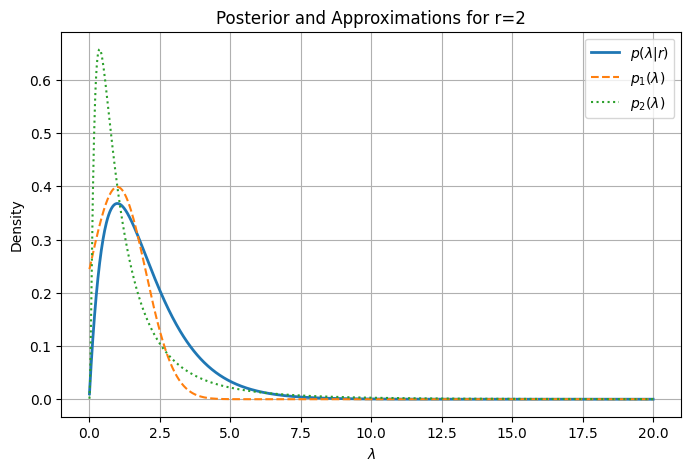

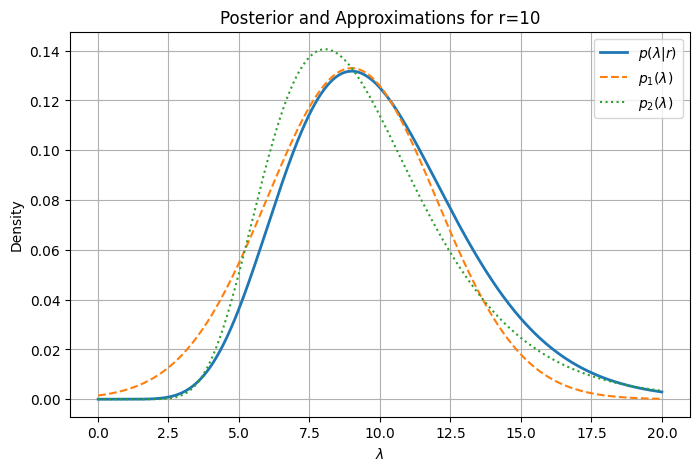

In [12]:
def p1_laplace_approximation(r, lambda_vals):
    if r > 1:
        mode = r - 1
        sigma = np.sqrt(r - 1)
    else:  # For r=1, mode=0, approximate with small positive value
        mode = 0.01
        sigma = 1
    return norm.pdf(lambda_vals, loc=mode, scale=sigma)

def p2_laplace_approximation(r, lambda_vals):
    if r > 1:
        mode = np.log(r - 1)
        sigma = 1/ np.sqrt(r - 1)
    else:
        mode = np.log(0.01)
        sigma = 1
    return (1/lambda_vals) * norm.pdf(np.log(lambda_vals), loc=mode, scale=sigma)

r_values = [2,10]
lambda_vals = np.linspace(0.01,20,1000)

for r in r_values:
    posterior = gamma.pdf(lambda_vals, a=r, scale=1)
    p1 = p1_laplace_approximation(r, lambda_vals)
    p2 = p2_laplace_approximation(r, lambda_vals)
    
    plt.figure(figsize=(8,5))
    plt.plot(lambda_vals, posterior, label='$p(\\lambda|r)$', linewidth=2)
    plt.plot(lambda_vals, p1, '--', label='$p_1(\\lambda)$')
    plt.plot(lambda_vals, p2, ':', label='$p_2(\\lambda)$')
    plt.title(f'Posterior and Approximations for r={r}')
    plt.xlabel('$\\lambda$')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

$r=10$ gives a better approximation as it is closer to the original gamma distribution. TODO: Why ?

#### Ex 2.4

Data points $\mathcal{D}=(x_i,t_i)$, $i=1,...,N$
are believed to come from a straight line with noise. The experimenter
chooses $x_i$ and assumes that $t_i$ is Gaussian distributed about
$w_0+w_1x_i$
with variance $\sigma^2$. Model $\mathcal{H}_1$ assumes the
straight line to be horizontal ($w_1=0$), whereas model $\mathcal{H}_2$
assumes a normal prior on $w_1$, i.e. $w_1 \sim \mathcal{N}(0,1)$.
Both models assign a normal prior to $w_0$. Given the data, what
is the evidence for each model? Follow these steps.

  * Write and expression $p(\mathcal{D}|w_0,w_1,\mathcal{H}_i)$.
    Note that it is a product of functions of $w_0$ and $w_1$.
  * Compute the odds ratio $\frac{p(\mathcal{D}|\mathcal{H}_1)}{p(\mathcal{D}|\mathcal{H}_2)}$.
    Show the result as a function of the input variance $s^2=\frac{1}{N}\sum_ix_i^2$,
    the input-output correlation $c=\frac{1}{N}\sum_ix_it_i$. Hint:
    make use of the factorization of the integrals over $w_0$ and $w_1$.
  * Show that, in the limit of large $N$, the simpler model $\mathcal{H}_1$
    is preferred when $c^2 \lesssim \frac{\log N}{N}$ and the complex
    model is preferred otherwise. Hint: use the simplifying assumption
    $\sigma^2=\langle x_i^2 \rangle =1$.

#### Ex 2.5

A $k$-sided die is rolled $n$ times and the outcomes are $\mathcal{D}=(n_1,...,n_k)$,
where $n_i$ is the number of times the die lands with side $i$
up, $i=1,...,k$ and $\sum_i^kn_i=n$.

  * Compute the probability of the observed data assuming that the die
    is perfectly fair ($\mathcal{H}_0$).
  * Compute the probability of the data under the alternative hypothesis
    $\mathcal{H}_1$ that the die has an unknown probability $p_i$
    for outcome $i$ and that $p_i$ is uniformly distributed. Use the
    fact that the probability density function of the Dirichlet distribution
    with parameters $\boldsymbol{\alpha}$ is $p(\boldsymbol{p}|\boldsymbol{\alpha})=\frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^kp_i^{\alpha_i-1}$.
    This pdf lives on the simples $S_k$ defined by $0\leq p_i \leq 1$
    and $\sum_ip_i=1$. The normalization is given by the multivariate
    Beta function
    $B(\boldsymbol{\alpha}) = \int_{S_k}d\boldsymbol{p}\prod_{i=1}^kp_i^{\alpha_i-1} = \frac{\prod_{i=1}^k\Gamma(\alpha_i)}{\Gamma(\sum_i^k\alpha_i)}$
  * Consider $k=6$, $n=30$ and $\boldsymbol{n}=(3,3,2,2,9,11)$.
    Compute the posterior of the models assuming equal priors and show
    that $\mathcal{H}_1$ is more likely. Instead, when $n_i=5$ show
    that $\mathcal{H}_0$ is more likely.
